In [15]:
!pip install pubchempy
import pandas as pd
from pubchempy import get_cids, get_compounds
from collections import Counter
from rdkit.Chem import Descriptors
from rdkit import Chem
from rdkit.Chem import AllChem
import pubchempy as pcp


You should consider upgrading via the 'C:\Users\Хозяин\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [16]:
df = pd.read_csv(r'C:\Users\Хозяин\питон\ind_task\data.csv')
df

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_3116,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,...,0.090625,-323.338627,-323.332830,-323.331885,-323.368166,21.459,-1226.756250,-1233.784350,-1240.302914,-1147.410874
1,gdb_117880,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,...,0.131823,-458.914682,-458.903948,-458.903004,-458.952489,35.183,-1655.449691,-1663.823171,-1673.306087,-1542.777940
2,gdb_23434,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,...,0.146098,-438.996978,-438.988148,-438.987204,-439.030829,32.710,-1694.820233,-1705.277043,-1715.352955,-1572.928492
3,gdb_61956,CC(CC=O)OCC#C,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,...,0.154138,-422.988608,-422.977883,-422.976938,-423.026195,36.895,-1838.172154,-1848.329015,-1858.997295,-1712.247413
4,gdb_98812,COC(=N)N1CCC1=N,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,...,0.147974,-435.272093,-435.262958,-435.262014,-435.306724,32.448,-1706.582262,-1716.847054,-1726.922966,-1584.819788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,gdb_48435,C1CC1(CCC#N)C=O,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,...,0.146377,-401.969669,-401.960439,-401.959495,-402.004365,33.153,-1814.359442,-1824.565876,-1834.641788,-1693.253970
4996,gdb_111594,CCN1C2CC3OC2C13,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,...,0.172360,-403.082393,-403.074974,-403.074030,-403.114261,30.043,-1884.752147,-1897.872105,-1909.134009,-1748.501118
4997,gdb_80576,CN1C2CC(O)CC12C,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,...,0.194093,-404.332161,-404.322884,-404.321940,-404.365564,36.045,-2041.141195,-2054.872347,-2067.320243,-1892.482430
4998,gdb_5182,c1cnc([nH]1)OC=O,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,...,0.084993,-414.713710,-414.706937,-414.705993,-414.745694,23.621,-1272.996133,-1279.411157,-1285.929721,-1192.179249


In [17]:
# Получаем список доступных дескрипторов RDKit
computed_descriptors = [
    (name, getattr(Descriptors, name)) 
    for name in Descriptors.__dict__ 
    if callable(getattr(Descriptors, name)) and not name.startswith("_")
]


In [18]:

computed_descriptors = Descriptors.descList
# Создание новых столбцов для дескрипторов
for descriptor in computed_descriptors:
    df[descriptor[0]] = df["smiles"].apply(lambda x: descriptor[1](Chem.MolFromSmiles(x)))
    

[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerator
[17:33:10] DEPRECATION WARNING: please use MorganGenerat

In [19]:
df.to_csv('data.csv2', index=False)

In [20]:
df1 = pd.DataFrame()# Создаем пустой DataFrame для новых свойств

In [21]:
property = ['IsomericSMILES','MolecularFormula', 'MolecularWeight', 'CanonicalSMILES', 'IsomericSMILES',
'InChI', 'InChIKey', 'IUPACName', 'XLogP', 'ExactMass', 'TPSA', 'Complexity']# Список свойств для вычисления
# Вычисляем свойства для каждой молекулы и добавляем в DataFrame
for index in df['smiles']:
    value = pcp.get_properties(property, index, 'smiles', as_dataframe=True)# Получаем свойства молекулы в виде DataFrame
    df1 = pd.concat([df1, value]) # Объединяем DataFrame с результатами

c:\Users\Хозяин\AppData\Local\Programs\Python\Python310\lib\site-packages\pubchempy.py:563: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self.charge is not 0:
c:\Users\Хозяин\AppData\Local\Programs\Python\Python310\lib\site-packages\pubchempy.py:563: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self.charge is not 0:


KeyboardInterrupt: 

In [22]:
df = pd.read_csv(r'C:\Users\Хозяин\питон\ind_task\data.csv2')
df

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,gdb_3116,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,...,0,0,0,0,0,0,0,0,0,0
1,gdb_117880,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,...,0,0,0,0,0,0,0,0,0,0
2,gdb_23434,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,...,0,0,0,0,0,0,0,0,0,0
3,gdb_61956,CC(CC=O)OCC#C,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,...,0,0,0,1,0,0,0,0,0,0
4,gdb_98812,COC(=N)N1CCC1=N,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,gdb_48435,C1CC1(CCC#N)C=O,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,...,0,0,0,0,0,0,0,0,0,0
4996,gdb_111594,CCN1C2CC3OC2C13,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,...,0,0,0,0,0,0,0,0,0,0
4997,gdb_80576,CN1C2CC(O)CC12C,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,...,0,0,0,0,0,0,0,0,0,0
4998,gdb_5182,c1cnc([nH]1)OC=O,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Удаляем ненужные столбцы
df1= df.drop(['mol_id', 'smiles'], axis=1)

In [24]:
disp = df1.var()# Вычислите дисперсию для каждого столбца
print(disp )

A                    1.807007
B                    0.207368
C                    0.112721
mu                   2.299563
alpha               63.592403
                      ...    
fr_thiazole          0.000000
fr_thiocyan          0.000000
fr_thiophene         0.000000
fr_unbrch_alkane     0.013511
fr_urea              0.008528
Length: 229, dtype: float64


In [25]:
FILTER_THRESHOLD = 0.1

to_drop = [column for column in disp.index if disp[column] < FILTER_THRESHOLD] # Удалите столбцы с дисперсией меньше 0.1

df2 = df1.drop(to_drop, axis=1)
df2

,A,B,C,mu,alpha,r2,u0,u298,h298,g298,...,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_bicyclic,fr_ether,fr_ketone,fr_ketone_Topliss,fr_nitrile,fr_piperdine,fr_term_acetylene
0,5.99438,2.27301,1.94738,4.5933,55.81,650.3290,-323.338627,-323.332830,-323.331885,-323.368166,...,0,0,0,1,1,0,0,1,0,0
1,2.32923,0.75737,0.59946,3.4068,77.34,1808.5114,-458.914682,-458.903948,-458.903004,-458.952489,...,1,0,0,0,1,0,0,0,0,0
2,2.71950,1.23126,1.02616,1.2920,76.75,1215.4323,-438.996978,-438.988148,-438.987204,-439.030829,...,0,0,0,1,1,0,0,0,0,0
3,2.29944,0.85305,0.65285,3.1488,79.50,1685.1071,-422.988608,-422.977883,-422.976938,-423.026195,...,1,0,0,0,1,0,0,0,0,1
4,3.03493,1.26316,0.90731,1.9135,77.81,1271.6972,-435.272093,-435.262958,-435.262014,-435.306724,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,0.78315,5.6157,77.77,1442.5369,-401.969669,-401.960439,-401.959495,-402.004365,...,1,0,0,0,0,0,0,1,0,0
4996,4.22393,1.23139,1.15079,1.2093,78.14,1141.0494,-403.082393,-403.074974,-403.074030,-403.114261,...,0,0,0,0,1,0,0,0,0,0
4997,2.40023,1.44261,1.26824,2.0425,81.95,1145.1258,-404.332161,-404.322884,-404.321940,-404.365564,...,0,0,0,1,0,0,0,0,1,0
4998,8.05652,1.25277,1.08801,4.1565,58.08,988.9973,-414.713710,-414.706937,-414.705993,-414.745694,...,0,0,0,0,1,0,0,0,0,0


In [26]:
##Предобработка данных
#поиск недостающих значений
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values in the data:")
print(missing_values)


Missing values in the data:
mol_id             0
MolMR              0
fr_Al_OH           0
fr_Al_OH_noTert    0
fr_ArN             0
                  ..
PEOE_VSA9          0
SMR_VSA1           0
SMR_VSA10          0
SMR_VSA2           0
fr_urea            0
Length: 231, dtype: int64


In [27]:
from sklearn.preprocessing import StandardScaler
cols = df2.columns
# Стандартизируйте данные
sc = StandardScaler()
X_std = sc.fit_transform(df2[cols].values)
X_std

array([[ 1.94455109,  1.91818951,  2.45854935, ...,  2.39814205,
        -0.2314757 , -0.33718407],
       [-0.78226161, -1.41046755, -1.5566255 , ..., -0.36724316,
        -0.2314757 , -0.33718407],
       [-0.491907  , -0.36970768, -0.28557447, ..., -0.36724316,
        -0.2314757 , -0.33718407],
       ...,
       [-0.72943875,  0.09446038,  0.43553177, ..., -0.36724316,
         2.0694756 , -0.33718407],
       [ 3.47875011, -0.32246729, -0.10133611, ..., -0.36724316,
        -0.2314757 , -0.33718407],
       [-0.44139049, -0.08321265, -0.44955703, ..., -0.36724316,
        -0.2314757 , -0.33718407]])

In [38]:
import numpy as np

In [39]:
# Удалите столбцы с корреляцией выше 0.9
FILTER_THRESHOLD= 0.9
# Вычислите ковариационную матрицу
cov_mat =np.cov(X_std.T)
cov_mat_df = pd.DataFrame(cov_mat, columns=cols)

upper_tri = cov_mat_df.where(
    np.triu(
        np.ones(cov_mat_df.shape), k=1).astype(np.bool_)
        )

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > FILTER_THRESHOLD)]

df3 = df2.drop(to_drop, axis=1)
df3

,A,B,mu,alpha,r2,u0,cv,u0_atom,MaxAbsEStateIndex,MinEStateIndex,...,fr_NH2,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_bicyclic,fr_ether,fr_ketone,fr_nitrile,fr_piperdine,fr_term_acetylene
0,5.99438,2.27301,4.5933,55.81,650.3290,-323.338627,21.459,-1226.756250,8.311944,-0.263889,...,0,0,0,0,1,1,0,1,0,0
1,2.32923,0.75737,3.4068,77.34,1808.5114,-458.914682,35.183,-1655.449691,9.588026,-0.847037,...,0,1,0,0,0,1,0,0,0,0
2,2.71950,1.23126,1.2920,76.75,1215.4323,-438.996978,32.710,-1694.820233,8.328809,0.371204,...,0,0,0,0,1,1,0,0,0,0
3,2.29944,0.85305,3.1488,79.50,1685.1071,-422.988608,36.895,-1838.172154,9.846767,-0.043009,...,0,1,0,0,0,1,0,0,0,1
4,3.03493,1.26316,1.9135,77.81,1271.6972,-435.272093,32.448,-1706.582262,7.125972,0.075231,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,5.6157,77.77,1442.5369,-401.969669,33.153,-1814.359442,10.285547,-0.059792,...,0,1,0,0,0,0,0,1,0,0
4996,4.22393,1.23139,1.2093,78.14,1141.0494,-403.082393,30.043,-1884.752147,5.502454,0.638843,...,0,0,0,0,0,1,0,0,0,0
4997,2.40023,1.44261,2.0425,81.95,1145.1258,-404.332161,36.045,-2041.141195,9.186319,-0.017407,...,0,0,0,0,1,0,0,0,1,0
4998,8.05652,1.25277,4.1565,58.08,988.9973,-414.713710,23.621,-1272.996133,9.590000,0.222222,...,0,0,0,0,0,1,0,0,0,0


In [56]:
df3.to_csv('data.csv3', index=False)

In [40]:
#поиск дубликатов
df3.duplicated().sum()



0

In [41]:
# Поиск выбросов (выбивающиеся значения по 0.95 квантилю)
df4 = df3.apply(lambda x: x.where(x <= x.quantile(0.95), np.nan) if x.dtype != 'object' else x)
df4

,A,B,mu,alpha,r2,u0,cv,u0_atom,MaxAbsEStateIndex,MinEStateIndex,...,fr_NH2,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_bicyclic,fr_ether,fr_ketone,fr_nitrile,fr_piperdine,fr_term_acetylene
0,NaN,NaN,4.5933,55.81,650.3290,NaN,21.459,NaN,8.311944,-0.263889,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,2.32923,0.75737,3.4068,77.34,NaN,-458.914682,35.183,-1655.449691,9.588026,-0.847037,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.71950,1.23126,1.2920,76.75,1215.4323,-438.996978,32.710,-1694.820233,8.328809,0.371204,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2.29944,0.85305,3.1488,79.50,1685.1071,-422.988608,36.895,-1838.172154,9.846767,-0.043009,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3.03493,1.26316,1.9135,77.81,1271.6972,-435.272093,32.448,-1706.582262,7.125972,0.075231,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,NaN,77.77,1442.5369,-401.969669,33.153,-1814.359442,10.285547,-0.059792,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4996,4.22393,1.23139,1.2093,78.14,1141.0494,-403.082393,30.043,-1884.752147,5.502454,0.638843,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4997,2.40023,1.44261,2.0425,81.95,1145.1258,-404.332161,36.045,-2041.141195,9.186319,-0.017407,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4998,NaN,1.25277,4.1565,58.08,988.9973,-414.713710,23.621,NaN,9.590000,0.222222,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
# 4. Нормализация данных (MinMaxScaler)(маштабирование (переводит значения в каждом числовом столбце в диапазон от 0 до 1.))
for col in df3.columns:# Перебор столбцов DataFrame
    if df3[col].dtype != 'object': 
        min_val = df3[col].min()# Определение минимального значения в столбце
        max_val = df3[col].max()# Определение максимального значения в столбце
        df3[col] = (df3[col] - min_val) / (max_val - min_val)# Нормализация значений в столбце
df3


,A,B,mu,alpha,r2,u0,cv,u0_atom,MaxAbsEStateIndex,MinEStateIndex,...,fr_NH2,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_bicyclic,fr_ether,fr_ketone,fr_nitrile,fr_piperdine,fr_term_acetylene
0,0.250894,0.333794,0.251268,0.339991,0.143688,0.630242,0.258423,0.659812,0.614869,0.724674,...,0.0,0.000000,0.0,0.0,0.125,0.333333,0.0,0.333333,0.0,0.0
1,0.097490,0.069634,0.186363,0.656190,0.570245,0.304257,0.674252,0.432332,0.731119,0.631448,...,0.0,0.333333,0.0,0.0,0.000,0.333333,0.0,0.000000,0.0,0.0
2,0.113824,0.152228,0.070676,0.647525,0.351814,0.352148,0.599321,0.411441,0.616406,0.826204,...,0.0,0.000000,0.0,0.0,0.125,0.333333,0.0,0.000000,0.0,0.0
3,0.096243,0.086310,0.172249,0.687913,0.524795,0.390639,0.726124,0.335373,0.754691,0.759985,...,0.0,0.333333,0.0,0.0,0.000,0.333333,0.0,0.000000,0.0,0.5
4,0.127027,0.157788,0.104674,0.663093,0.372537,0.361104,0.591383,0.405199,0.506828,0.778888,...,0.0,0.000000,0.0,0.0,0.000,0.333333,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.118011,0.103648,0.307196,0.662506,0.435457,0.441178,0.612744,0.348009,0.794663,0.757302,...,0.0,0.333333,0.0,0.0,0.000,0.000000,0.0,0.333333,0.0,0.0
4996,0.176792,0.152251,0.066152,0.667939,0.324419,0.438503,0.518513,0.310656,0.358927,0.868991,...,0.0,0.000000,0.0,0.0,0.000,0.333333,0.0,0.000000,0.0,0.0
4997,0.100461,0.189064,0.111731,0.723895,0.325921,0.435498,0.700370,0.227671,0.694524,0.764078,...,0.0,0.000000,0.0,0.0,0.125,0.000000,0.0,0.000000,0.2,0.0
4998,0.337204,0.155977,0.227373,0.373329,0.268419,0.410536,0.323930,0.635275,0.731299,0.802387,...,0.0,0.000000,0.0,0.0,0.000,0.333333,0.0,0.000000,0.0,0.0


In [52]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Хозяин\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [51]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Хозяин\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [46]:
## Проведение статистических тестов
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from scipy import stats

In [49]:
# Проведение теста Шапиро-Уилка
statist = stats.shapiro(df3)

# Вывод результатов
print( statist[1] >0.05)


False


In [57]:
from scipy.stats import ttest_ind

In [60]:


# Выполняем независимый t-тест между колонками 'cv' и 'u0_atom' 
t_stat, p_value = ttest_ind(df3['cv'], df3['u0_atom'], equal_var=False)

print("t-статистика:", t_stat)
print("p-значение:", p_value)

t-статистика: 76.17503902434923
p-значение: 0.0


In [64]:
from scipy import stats

In [67]:
# ANOVA (для сравнения нескольких групп)
anova_result = stats.f_oneway(df3['cv'], df3['u0_atom'], df3['mu'], df3['alpha'])
print("ANOVA результат:", anova_result)

ANOVA результат: F_onewayResult(statistic=18224.04393976109, pvalue=0.0)


In [ ]:
#Этап 4: Визуализация данных


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

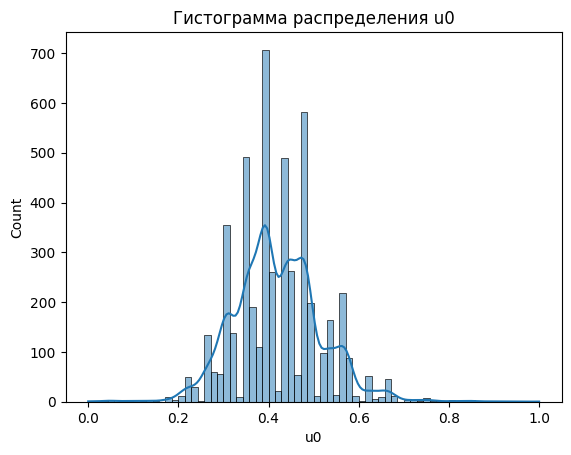

In [86]:
#Гистограмма ( показывает распределение значений в выбранном столбце. 
#Позволяет оценить форму распределения (нормальное, скошенное), наличие выбросов и частоту встречаемости значений.)
sns.histplot(df3['u0'], kde=True)
plt.title("Гистограмма распределения u0")
plt.show()

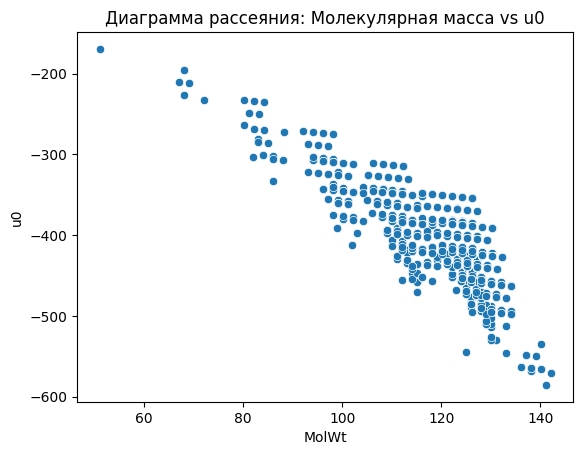

In [87]:
# Диаграмма рассеяния показывает зависимость между двумя переменными.
# Позволяет выявить линейную или нелинейную корреляцию, наличие кластеров и выбросов.
sns.scatterplot(x=df['MolWt'], y=df['u0'])
plt.title("Диаграмма рассеяния: Молекулярная масса vs u0")
plt.show()

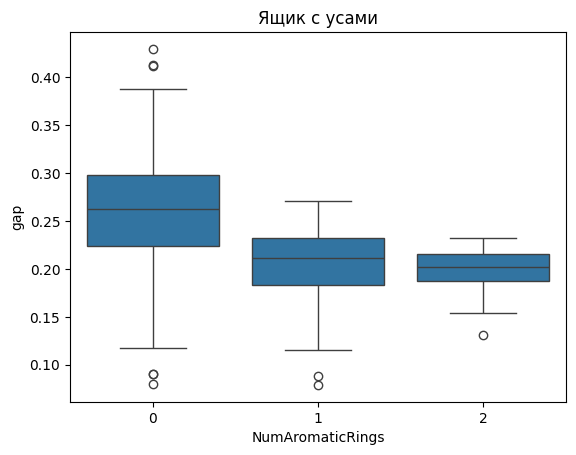

In [73]:
# BOXPLOT
sns.boxplot(x=df['NumAromaticRings'], y=df['gap'])
plt.title("Ящик с усами")
plt.show()

<Axes: >

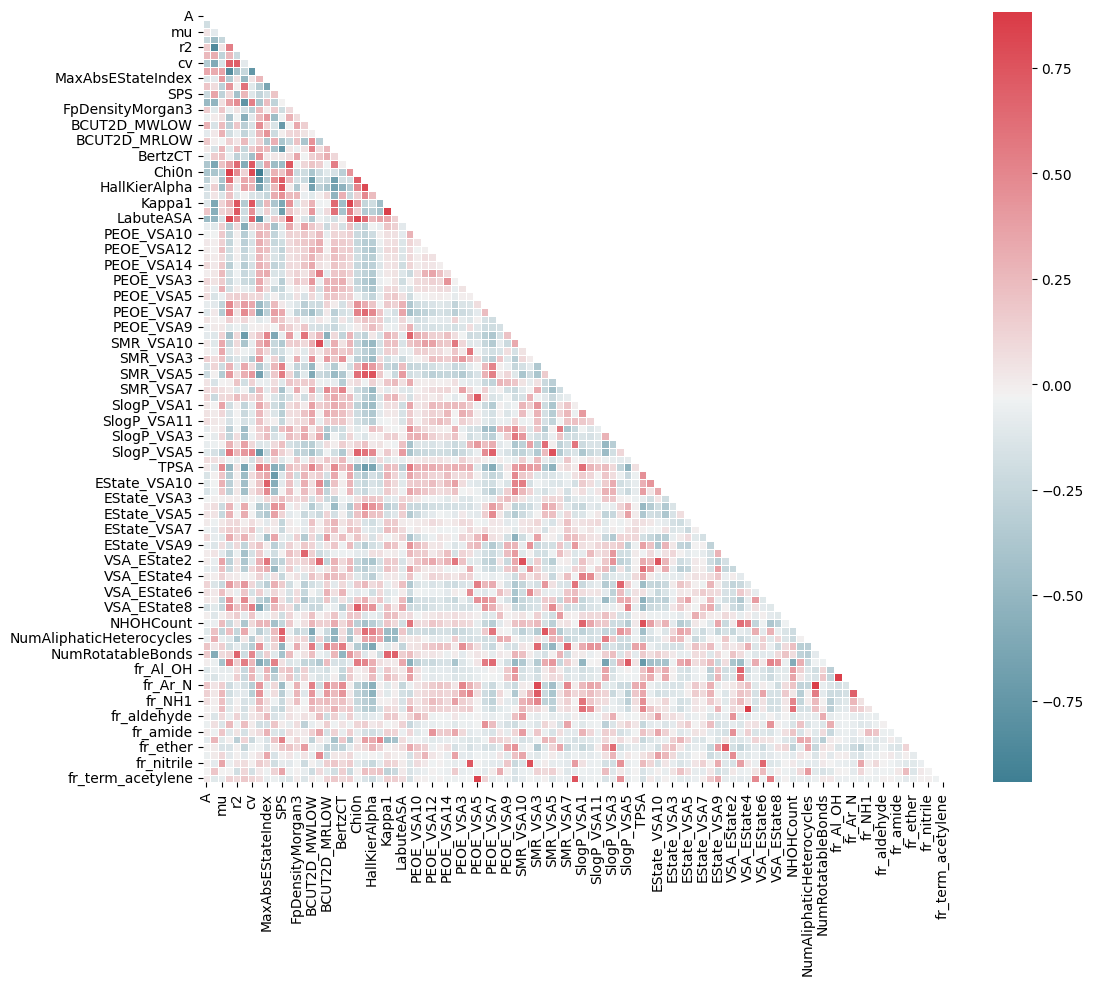

In [85]:
corr = df3.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10)) #создание графика и определение его размеров
cmap = sns.diverging_palette(220, 10, as_cmap=True) #создание палитры для корреляционного графика
sns.heatmap(corr, cmap=cmap, linewidths=.5, mask=mask, annot=False, fmt=".1f") 
#fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта